In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
import random
import os

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
# ID 제외 데이터 갖고오기 

train = pd.read_csv('../../DATA/train.csv').drop(columns=['ID'])
test  = pd.read_csv('../../DATA/test.csv').drop(columns=['ID'])
trade = pd.read_csv('../../DATA/international_trade.csv')

In [3]:
# 데이터 타입 변경, 열 이름 변경 

new_column_names = {
    'corporation': 'corp',
    'location': 'loc',
    'supply(kg)': 'supply',
    'price(원/kg)': 'price',
}

train = train.rename(columns=new_column_names)
test = test.rename(columns=new_column_names)

train['timestamp']  = pd.to_datetime(train['timestamp'])
test['timestamp']  = pd.to_datetime(test['timestamp'])

train['newitem'] = train['item'].str.cat([train['corp'], train['loc']], sep=' ')



In [4]:

train['newitem'] = train['item'].str.cat([train['corp'], train['loc']], sep=' ')


In [5]:
#가격 시계열 price_data 생성하기 

unique_values = train['newitem'].unique()
# 날짜 범위 생성
start_date = datetime(2019, 1, 1).date()
end_date =datetime(2023, 3, 3).date()
dates = pd.date_range(start_date, end_date, freq='D')

# 데이터프레임 생성
price_data = pd.DataFrame(columns=['item'] + dates.strftime('%Y-%m-%d').tolist())
price_data['item'] = unique_values

# print(len(price_data)) 39 
for i in range(len(price_data)) :
    price_data.iloc[i,1:] = train['price'][i*1523 : (i+1)*1523 ]
price_data['item'] = price_data['item'].astype(str)
price_data['corp'] = price_data['item'].str[3:4]

price_data['loca'] = price_data['item'].str[-1:]
price_data['product'] = price_data['item'].str[:2]
cols = price_data.columns[-3:]  # 가장 뒤의 3개 열의 열 이름을 선택
price_data = price_data[cols.tolist() + price_data.columns[:-3].tolist()]  # 열 순서 변경


In [6]:
price_data

,corp,loca,product,item,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,...,2023-02-22,2023-02-23,2023-02-24,2023-02-25,2023-02-26,2023-02-27,2023-02-28,2023-03-01,2023-03-02,2023-03-03
0,A,J,TG,TG A J,0.0,0.0,1728.0,1408.0,1250.0,0.0,...,2813.0,2770.0,2633.0,3155.0,0.0,2657.0,3922.0,3397.0,3195.0,3640.0
1,A,S,TG,TG A S,0.0,0.0,2526.0,2134.0,2075.0,0.0,...,3444.0,3481.0,3518.0,4201.0,0.0,4166.0,4009.0,4173.0,4219.0,4089.0
2,B,J,TG,TG B J,0.0,0.0,1692.0,1516.0,1471.0,0.0,...,4175.0,6216.0,3558.0,2412.0,0.0,3540.0,3141.0,6382.0,3558.0,3470.0
3,B,S,TG,TG B S,0.0,0.0,1944.0,1815.0,1717.0,0.0,...,3202.0,3478.0,3939.0,3677.0,0.0,4057.0,3821.0,4037.0,4004.0,4241.0
4,C,J,TG,TG C J,0.0,0.0,1965.0,1794.0,1773.0,0.0,...,4017.0,4585.0,4835.0,5550.0,0.0,5037.0,2643.0,3742.0,3983.0,5175.0
5,C,S,TG,TG C S,0.0,0.0,2078.0,2002.0,1815.0,0.0,...,3228.0,3484.0,3773.0,4298.0,0.0,4180.0,4234.0,4357.0,4466.0,4748.0
6,D,J,TG,TG D J,0.0,0.0,1616.0,1337.0,1234.0,0.0,...,0.0,0.0,1838.0,1829.0,0.0,0.0,0.0,0.0,0.0,0.0
7,D,S,TG,TG D S,0.0,0.0,2048.0,1757.0,1719.0,0.0,...,2539.0,2955.0,3323.0,3321.0,0.0,3409.0,3236.0,4631.0,4114.0,4146.0
8,E,J,TG,TG E J,0.0,0.0,1692.0,1475.0,1392.0,0.0,...,3157.0,4793.0,2403.0,1489.0,0.0,2620.0,1673.0,0.0,1904.0,1622.0
9,E,S,TG,TG E S,0.0,0.0,2151.0,1829.0,2002.0,0.0,...,3400.0,3349.0,3026.0,2946.0,0.0,3418.0,3141.0,4235.0,3960.0,3791.0


<Axes: >

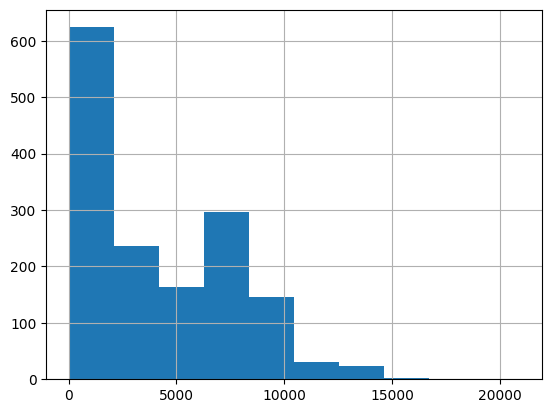

In [162]:
#6,11,14, 16,20,23,24,27,31,33
price_data.iloc[4,4 :].hist()

In [7]:
# 모든 상품의 가격이 0인 날들 

zero_sum_columns = []
# 1번부터 100번까지의 열 순회
for column in range(1, 1524):
    column_name =price_data.columns[column]
    column_sum =price_data.iloc[:, column].sum()
    if column_sum == 0:
        zero_sum_columns.append(column_name)

# zero_sum_columns에 들어있는 날짜들을 datetime 형식으로 변환
zero_sum_dates = pd.to_datetime(zero_sum_columns)

# 주중(weekday) 값을 반환하여 리스트에 저장
weekday_values = [date.weekday() for date in zero_sum_dates]

# 결과 출력
print( len(zero_sum_columns))
print(weekday_values.count(6))
# 결과 출력
print(weekday_values)

252
216
[1, 2, 6, 6, 6, 6, 6, 1, 2, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 3, 6, 6, 6, 5, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 5, 6, 6, 6, 6, 6, 6, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 0, 1, 2, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 0, 1, 2, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 0, 1, 6, 6, 6, 6, 6]


In [8]:
from holidays import country_holidays
years  = [2019,2020,2021,2022,2023 ]
holi_dates=[]
for year in years :
    holidayarr = country_holidays('KR', years = year).items()
    for day in holidayarr:
        holi_dates.append(day[0])
    

holi_dates = pd.to_datetime(holi_dates)
zero_sum_columns = pd.to_datetime(zero_sum_columns)
cnt = 0 

#일요일이 아니면서 전체 가격이 0인 경우 -> 값을 보간 해줘야 한다. 
for i in range(len(zero_sum_columns)):
    if pd.to_datetime(zero_sum_columns[i]) in holi_dates and zero_sum_columns[i].weekday()!= 6:
        cnt += 1 
        print(zero_sum_columns[i])

2019-01-01 00:00:00
2019-02-05 00:00:00
2019-02-06 00:00:00
2019-09-13 00:00:00
2019-09-14 00:00:00
2020-01-01 00:00:00
2020-01-25 00:00:00
2020-01-27 00:00:00
2020-10-01 00:00:00
2020-10-02 00:00:00
2020-10-03 00:00:00
2021-01-01 00:00:00
2021-02-12 00:00:00
2021-02-13 00:00:00
2021-09-20 00:00:00
2021-09-21 00:00:00
2021-09-22 00:00:00
2022-01-01 00:00:00
2022-01-31 00:00:00
2022-02-01 00:00:00
2022-02-02 00:00:00
2022-09-10 00:00:00
2022-09-12 00:00:00
2023-01-23 00:00:00
2023-01-24 00:00:00


In [159]:
items_trade = trade['품목명'].unique()
(items_trade)

array(['토마토(신선한 것이나 냉장한 것으로 한정한다)', '양파', '쪽파', '꽃양배추와 브로콜리(broccoli)',
       '방울다다기 양배추', '양배추', '결구(結球) 상추',
       '위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]',
       '당근', '오이류(신선한 것이나 냉장한 것으로 한정한다)',
       '콩[비그나(Vigna)속ㆍ파세러스(Phaseolus)속)]', '대추야자', '무화과', '파인애플',
       '망고(mango)', '망고스틴(mangosteen)', '오렌지', '감귤',
       '그레이프프루트(grapefruit)와 포멜로(pomelo)',
       '레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]', '수박',
       '포포(papaw)[파파야(papaya)]', '사과', '배', '자두',
       '완두[피섬 새티범(Pisum sativum)]', '구아바(guava)', '살구',
       '신 체리[프루너스 체라서스(Prunus cerasus)]', '복숭아[넥터린(nectarine)을 포함한다]',
       '순무', '방울토마토', '샬롯(shallot)', '참외'], dtype=object)

In [184]:
trade[trade['품목명']== '결구(結球) 상추']

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
6,2019-01,결구(結球) 상추,85200,95,258096,165,-70
31,2019-02,결구(結球) 상추,40150,45,309258,213,-167
54,2019-03,결구(結球) 상추,36,0,151776,106,-106
78,2019-04,결구(結球) 상추,67147,71,8,0,71
102,2019-05,결구(結球) 상추,86226,131,0,0,131
129,2019-06,결구(結球) 상추,938621,955,104,0,955
156,2019-07,결구(結球) 상추,248976,280,2091851,1496,-1216
183,2019-08,결구(結球) 상추,31936,69,4136721,3220,-3151
210,2019-09,결구(結球) 상추,16879,53,1870221,1378,-1324
238,2019-10,결구(結球) 상추,3166,8,762228,505,-497
